In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)



DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data'


if os.path.exists(DATA_DIR):
    print(f"Data directory found: {DATA_DIR}\n")
    

    datasets = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
    datasets.sort()
    
    print(f"Found {len(datasets)} datasets:")
    for i, dataset in enumerate(datasets, 1):
        print(f"  {i}. {dataset}")
else:
    print(f"Data directory not found: {DATA_DIR}")


Data directory found: /kaggle/input/fine-tune-dataset-mol/data

Found 10 datasets:
  1. bace
  2. bbbp
  3. clintox
  4. esol
  5. freesolv
  6. hiv
  7. lipo
  8. qm9
  9. sider
  10. tox21


In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported successfully!")


# ============================================
# CELL 2: Set Data Directory and List Datasets
# ============================================

# Main data directory
DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data'

# Check if directory exists
if os.path.exists(DATA_DIR):
    print(f"✓ Data directory found: {DATA_DIR}\n")
    
    # List all datasets
    datasets = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
    datasets.sort()
    
    print(f"Found {len(datasets)} datasets:")
    for i, dataset in enumerate(datasets, 1):
        print(f"  {i}. {dataset}")
else:
    print(f"⚠️ Data directory not found: {DATA_DIR}")


# ============================================
# CELL 3: Dataset Information
# ============================================

DATASET_INFO = {
    'bace': {
        'name': 'BACE Inhibitors',
        'task': 'Binary Classification',
        'description': 'Inhibitors vs non-inhibitors for human β-secretase 1'
    },
    'bbbp': {
        'name': 'Blood-Brain Barrier Penetration',
        'task': 'Binary Classification',
        'description': 'Whether compounds can cross the blood-brain barrier'
    },
    'clintox': {
        'name': 'Clinical Toxicity',
        'task': 'Binary/Multi Classification',
        'description': 'Drugs approved vs failed in clinical trials due to toxicity'
    },
    'esol': {
        'name': 'ESOL Solubility',
        'task': 'Regression',
        'description': 'Aqueous solubility of compounds'
    },
    'freesolv': {
        'name': 'FreeSolv',
        'task': 'Regression',
        'description': 'Hydration free energy of small molecules'
    },
    'hiv': {
        'name': 'HIV Activity',
        'task': 'Binary Classification',
        'description': 'Active vs inactive compounds against HIV replication'
    },
    'lipo': {
        'name': 'Lipophilicity',
        'task': 'Regression',
        'description': 'Experimental logD values (lipophilicity)'
    },
    'qm9': {
        'name': 'Quantum Mechanics',
        'task': 'Regression',
        'description': 'Molecular properties like dipole moment, HOMO/LUMO energies'
    },
    'sider': {
        'name': 'Side Effect Resource',
        'task': 'Multilabel Classification',
        'description': 'Mapping drugs to side effects'
    },
    'tox21': {
        'name': 'Tox21',
        'task': 'Multilabel Classification',
        'description': 'Toxicity measurements for 12 biological assays'
    }
}

# Display dataset information
print("DATASET INFORMATION")
print("=" * 100)
for dataset, info in DATASET_INFO.items():
    print(f"\n{dataset.upper()}")
    print(f"  Name: {info['name']}")
    print(f"  Task: {info['task']}")
    print(f"  Description: {info['description']}")

✓ Libraries imported successfully!
✓ Data directory found: /kaggle/input/fine-tune-dataset-mol/data

Found 10 datasets:
  1. bace
  2. bbbp
  3. clintox
  4. esol
  5. freesolv
  6. hiv
  7. lipo
  8. qm9
  9. sider
  10. tox21
DATASET INFORMATION

BACE
  Name: BACE Inhibitors
  Task: Binary Classification
  Description: Inhibitors vs non-inhibitors for human β-secretase 1

BBBP
  Name: Blood-Brain Barrier Penetration
  Task: Binary Classification
  Description: Whether compounds can cross the blood-brain barrier

CLINTOX
  Name: Clinical Toxicity
  Task: Binary/Multi Classification
  Description: Drugs approved vs failed in clinical trials due to toxicity

ESOL
  Name: ESOL Solubility
  Task: Regression
  Description: Aqueous solubility of compounds

FREESOLV
  Name: FreeSolv
  Task: Regression
  Description: Hydration free energy of small molecules

HIV
  Name: HIV Activity
  Task: Binary Classification
  Description: Active vs inactive compounds against HIV replication

LIPO
  Name:

In [3]:
datasets = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
datasets.sort()

print("COLUMN NAMES FOR EACH DATASET")
print("=" * 80)

for dataset in datasets:
    print(f"\n{dataset.upper()}")
    print("-" * 80)
    
    dataset_path = os.path.join(DATA_DIR, dataset)
    
    # Check train.csv
    train_path = os.path.join(dataset_path, 'train.csv')
    if os.path.exists(train_path):
        df = pd.read_csv(train_path)
        print(f"Columns: {list(df.columns)}")
        print(f"Number of columns: {len(df.columns)}")
    else:
        print("train.csv not found")

COLUMN NAMES FOR EACH DATASET

BACE
--------------------------------------------------------------------------------
Columns: ['smiles', 'CID', 'Class', 'Unnamed: 3', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD', 'RB', 'HeavyAtomCount', 'ChiralCenterCount', 'ChiralCenterCountAllPossible', 'RingCount', 'PSA', 'Estate', 'MR', 'Polar', 'sLi_Key', 'ssBe_Key', 'ssssBem_Key', 'sBH2_Key', 'ssBH_Key', 'sssB_Key', 'ssssBm_Key', 'sCH3_Key', 'dCH2_Key', 'ssCH2_Key', 'tCH_Key', 'dsCH_Key', 'aaCH_Key', 'sssCH_Key', 'ddC_Key', 'tsC_Key', 'dssC_Key', 'aasC_Key', 'aaaC_Key', 'ssssC_Key', 'sNH3_Key', 'sNH2_Key', 'ssNH2_Key', 'dNH_Key', 'ssNH_Key', 'aaNH_Key', 'tN_Key', 'sssNH_Key', 'dsN_Key', 'aaN_Key', 'sssN_Key', 'ddsN_Key', 'aasN_Key', 'ssssN_Key', 'daaN_Key', 'sOH_Key', 'dO_Key', 'ssO_Key', 'aaO_Key', 'aOm_Key', 'sOm_Key', 'sF_Key', 'sSiH3_Key', 'ssSiH2_Key', 'sssSiH_Key', 'ssssSi_Key', 'sPH2_Key', 'ssPH_Key', 'sssP_Key', 'dsssP_Key', 'ddsP_Key', 'sssssP_Key', 'sSH_Key', 'dS_Key', 'ssS_Key', 'aaS_Key', 'ds

In [4]:
datasets = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
datasets.sort()

print("CHECKING ALL FILES IN EACH DATASET FOLDER")
print("=" * 100)

for dataset in datasets:
    print(f"\n{dataset.upper()}")
    print("-" * 100)
    
    dataset_path = os.path.join(DATA_DIR, dataset)
    
    # List all files in the folder
    files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
    files.sort()
    
    print(f"Files found: {files}")
    
    # Check each CSV file
    for file in files:
        file_path = os.path.join(dataset_path, file)
        df = pd.read_csv(file_path)
        print(f"\n  {file}:")
        print(f"    Columns: {list(df.columns)}")
        print(f"    Shape: {df.shape}")
        print(f"    Rows: {len(df)}")

CHECKING ALL FILES IN EACH DATASET FOLDER

BACE
----------------------------------------------------------------------------------------------------
Files found: ['test.csv', 'train.csv', 'valid.csv']

  test.csv:
    Columns: ['smiles', 'CID', 'Class', 'Unnamed: 3', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD', 'RB', 'HeavyAtomCount', 'ChiralCenterCount', 'ChiralCenterCountAllPossible', 'RingCount', 'PSA', 'Estate', 'MR', 'Polar', 'sLi_Key', 'ssBe_Key', 'ssssBem_Key', 'sBH2_Key', 'ssBH_Key', 'sssB_Key', 'ssssBm_Key', 'sCH3_Key', 'dCH2_Key', 'ssCH2_Key', 'tCH_Key', 'dsCH_Key', 'aaCH_Key', 'sssCH_Key', 'ddC_Key', 'tsC_Key', 'dssC_Key', 'aasC_Key', 'aaaC_Key', 'ssssC_Key', 'sNH3_Key', 'sNH2_Key', 'ssNH2_Key', 'dNH_Key', 'ssNH_Key', 'aaNH_Key', 'tN_Key', 'sssNH_Key', 'dsN_Key', 'aaN_Key', 'sssN_Key', 'ddsN_Key', 'aasN_Key', 'ssssN_Key', 'daaN_Key', 'sOH_Key', 'dO_Key', 'ssO_Key', 'aaO_Key', 'aOm_Key', 'sOm_Key', 'sF_Key', 'sSiH3_Key', 'ssSiH2_Key', 'sssSiH_Key', 'ssssSi_Key', 'sPH2_Key', 'ssPH_Ke

In [5]:
import os
import pandas as pd

# Data directory
DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data'

# Get all dataset folders
datasets = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
datasets.sort()

# Store results
summary_list = []

for dataset in datasets:
    dataset_path = os.path.join(DATA_DIR, dataset)
    
    # List all CSV files
    files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
    
    for file in files:
        file_path = os.path.join(dataset_path, file)
        df = pd.read_csv(file_path)
        
        summary_list.append({
            'Dataset': dataset,
            'File': file,
            'Rows': len(df),
            'Columns': len(df.columns),
            'Column_Names': ', '.join(df.columns)
        })

# Create summary DataFrame
summary_df = pd.DataFrame(summary_list)

# Display
print("DATASET SUMMARY")
print("=" * 120)
print(summary_df.to_string(index=False))

# Save to CSV
summary_df.to_csv('dataset_summary.csv', index=False)
print("\n✓ Summary saved to 'dataset_summary.csv'")

# Show grouped summary by dataset
print("\n" + "=" * 120)
print("GROUPED SUMMARY BY DATASET")
print("=" * 120)

grouped = summary_df.groupby('Dataset').agg({
    'Rows': 'sum',
    'Columns': 'first',  # Assuming all files in same dataset have same columns
    'File': 'count'
}).rename(columns={'File': 'Num_Files'})

print(grouped)

DATASET SUMMARY
 Dataset                File   Rows  Columns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [6]:
import pandas as pd
import os

# Data directory
DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data'

# QM9 dataset path
qm9_path = os.path.join(DATA_DIR, 'qm9')

print("QM9 DATASET ANALYSIS")
print("=" * 100)

# Check all QM9 files
files = ['qm9_train.csv', 'qm9_valid.csv', 'qm9_test.csv']

for file in files:
    file_path = os.path.join(qm9_path, file)
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        print(f"\n{file}")
        print("-" * 100)
        print(f"Shape: {df.shape}")
        print(f"Rows: {len(df)}")
        print(f"Columns: {len(df.columns)}")
        
        print(f"\nColumn Names:")
        for i, col in enumerate(df.columns, 1):
            print(f"  {i:2d}. {col}")
        
        print(f"\nFirst 3 rows:")
        print(df.head(3))
        
        print(f"\nData types:")
        print(df.dtypes)

# Identify target columns (properties to predict)
print("\n" + "=" * 100)
print("TARGET PROPERTIES (columns to predict from SMILES)")
print("=" * 100)

df = pd.read_csv(os.path.join(qm9_path, 'qm9_train.csv'))
non_target_cols = ['mol_id', 'smiles']
target_cols = [col for col in df.columns if col not in non_target_cols]

print(f"\nInput column: 'smiles'")
print(f"Total target properties: {len(target_cols)}")
print(f"\nTarget properties to predict:")
for i, col in enumerate(target_cols, 1):
    print(f"  {i:2d}. {col}")

# Summary statistics for each target
print("\n" + "=" * 100)
print("TARGET PROPERTY STATISTICS")
print("=" * 100)

for col in target_cols:
    print(f"\n{col}:")
    print(df[col].describe())

QM9 DATASET ANALYSIS

qm9_train.csv
----------------------------------------------------------------------------------------------------
Shape: (108446, 21)
Rows: 108446
Columns: 21

Column Names:
   1. mol_id
   2. smiles
   3. A
   4. B
   5. C
   6. mu
   7. alpha
   8. homo
   9. lumo
  10. gap
  11. r2
  12. zpve
  13. u0
  14. u298
  15. h298
  16. g298
  17. cv
  18. u0_atom
  19. u298_atom
  20. h298_atom
  21. g298_atom

First 3 rows:
       mol_id               smiles        A        B        C      mu  alpha  \
0  gdb_107415      COC12CC1OC(C)C2  3.38681  1.14926  0.98518  1.8591  78.91   
1   gdb_62043       CC(NCC1CO1)C#N  4.01899  0.69584  0.64544  5.0508  77.38   
2   gdb_27194  Cc1c2c(c[nH]1)CC=C2  3.22063  1.55482  1.06237  1.8096  88.26   

     homo    lumo     gap  ...      zpve          u0        u298        h298  \
0 -0.2347  0.0895  0.3242  ...  0.181324 -424.206105 -424.197009 -424.196065   
1 -0.2472  0.0265  0.2738  ...  0.158172 -419.182189 -419.172406 -419.1

In [7]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, 
    AutoModel,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")


2025-10-04 08:03:22.360324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759565002.535525      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759565002.588614      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA device: Tesla P100-PCIE-16GB


In [8]:
# ============================================
# CELL 1: Install and Import Libraries
# ============================================

# Uncomment if needed
# !pip install transformers accelerate -q

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, 
    AutoModel,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")


# ============================================
# CELL 2: Configuration and Setup
# ============================================

# Configuration
class Config:
    # Paths
    DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data/qm9'
    OUTPUT_DIR = './molformer_qm9_output'
    MODEL_SAVE_DIR = './molformer_qm9_saved_model'
    
    # Model
    MODEL_NAME = "ibm-research/MoLFormer-XL-both-10pct"
    MAX_LENGTH = 512
    
    # Target properties
    TARGET_PROPERTIES = ['gap', 'homo', 'lumo']
    NUM_LABELS = len(TARGET_PROPERTIES)
    
    # Training
    BATCH_SIZE = 16
    LEARNING_RATE = 2e-5
    NUM_EPOCHS = 10
    WEIGHT_DECAY = 0.01
    WARMUP_STEPS = 500
    
    # Other
    SEED = 42

config = Config()

# Create directories
os.makedirs(config.OUTPUT_DIR, exist_ok=True)
os.makedirs(config.MODEL_SAVE_DIR, exist_ok=True)

# Set seed for reproducibility
torch.manual_seed(config.SEED)
np.random.seed(config.SEED)

print("Configuration loaded successfully!")
print(f"Training on properties: {config.TARGET_PROPERTIES}")
print(f"Output directory: {config.OUTPUT_DIR}")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA device: Tesla P100-PCIE-16GB
Configuration loaded successfully!
Training on properties: ['gap', 'homo', 'lumo']
Output directory: ./molformer_qm9_output


In [9]:
# ============================================
# CELL 1: Install and Import Libraries
# ============================================

# Uncomment if needed
# !pip install transformers accelerate -q

import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, 
    AutoModel,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")


# ============================================
# CELL 2: Configuration and Setup
# ============================================

# Configuration
class Config:
    # Paths
    DATA_DIR = '/kaggle/input/fine-tune-dataset-mol/data/qm9'
    OUTPUT_DIR = './molformer_qm9_output'
    MODEL_SAVE_DIR = './molformer_qm9_saved_model'
    
    # Model
    MODEL_NAME = "ibm-research/MoLFormer-XL-both-10pct"
    MAX_LENGTH = 512
    
    # Target properties
    TARGET_PROPERTIES = ['gap', 'homo', 'lumo']
    NUM_LABELS = len(TARGET_PROPERTIES)
    
    # Training
    BATCH_SIZE = 16
    LEARNING_RATE = 2e-5
    NUM_EPOCHS = 10
    WEIGHT_DECAY = 0.01
    WARMUP_STEPS = 500
    
    # Other
    SEED = 42

config = Config()

# Create directories
os.makedirs(config.OUTPUT_DIR, exist_ok=True)
os.makedirs(config.MODEL_SAVE_DIR, exist_ok=True)

# Set seed for reproducibility
torch.manual_seed(config.SEED)
np.random.seed(config.SEED)

print("Configuration loaded successfully!")
print(f"Training on properties: {config.TARGET_PROPERTIES}")
print(f"Output directory: {config.OUTPUT_DIR}")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA device: Tesla P100-PCIE-16GB
Configuration loaded successfully!
Training on properties: ['gap', 'homo', 'lumo']
Output directory: ./molformer_qm9_output


Train set: 108446 samples
Valid set: 12050 samples
Test set:  13389 samples

Target properties statistics (Train set):
                 gap           homo           lumo
count  108446.000000  108446.000000  108446.000000
mean        0.250993      -0.239937       0.011055
std         0.047509       0.022175       0.046951
min         0.024600      -0.428600      -0.172000
25%         0.216200      -0.252500      -0.023900
50%         0.249300      -0.241000       0.011900
75%         0.288100      -0.228600       0.049000
max         0.622100      -0.101700       0.193500


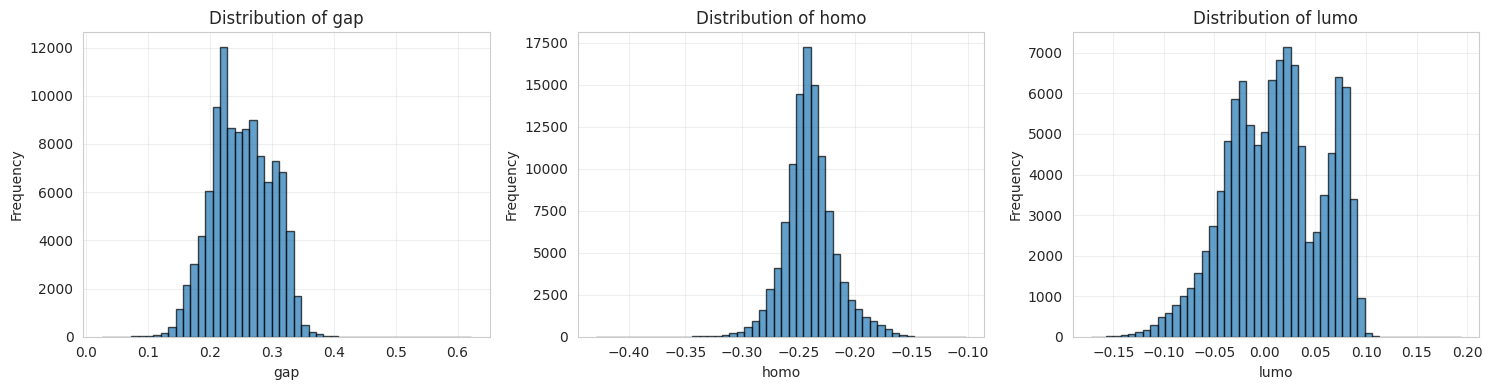

In [11]:
train_df = pd.read_csv(os.path.join(config.DATA_DIR, 'qm9_train.csv'))
valid_df = pd.read_csv(os.path.join(config.DATA_DIR, 'qm9_valid.csv'))
test_df = pd.read_csv(os.path.join(config.DATA_DIR, 'qm9_test.csv'))

print(f"Train set: {len(train_df)} samples")
print(f"Valid set: {len(valid_df)} samples")
print(f"Test set:  {len(test_df)} samples")

print(f"\nTarget properties statistics (Train set):")
print(train_df[config.TARGET_PROPERTIES].describe())

# Visualize target distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, prop in enumerate(config.TARGET_PROPERTIES):
    axes[i].hist(train_df[prop], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(prop)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {prop}')
    axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(config.OUTPUT_DIR, 'target_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()

In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 56.6 MB/s eta 0:00:00:00:0100:01


In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting QM9 Preprocessing...")

class Config:
    DATA_PATH = '/kaggle/input/fine-tune-dataset-mol/data/qm9/qm9_train.csv'
    OUTPUT_DIR = './preprocessed_qm9_data'
    MORGAN_RADIUS = 2
    MORGAN_BITS = 2048
    USE_SUBSET = False   # take the whole dataset
    SUBSET_FRACTION = 0.2
    SEED = 42

config = Config()
os.makedirs(config.OUTPUT_DIR, exist_ok=True)

print(f"\nLoading data from: {config.DATA_PATH}")
df = pd.read_csv(config.DATA_PATH)
print(f"Original data shape: {df.shape}")

# infer target properties (all except mol_id and smiles)
all_columns = list(df.columns)
config.TARGET_PROPERTIES = [c for c in all_columns if c not in ['mol_id', 'smiles']]
print(f"Using {len(config.TARGET_PROPERTIES)} target properties: {config.TARGET_PROPERTIES[:10]}...")

if config.USE_SUBSET:
    df = df.sample(frac=config.SUBSET_FRACTION, random_state=config.SEED).reset_index(drop=True)
    print(f"Using {config.SUBSET_FRACTION*100}% subset: {len(df)} samples")

original_len = len(df)
df = df.dropna(subset=config.TARGET_PROPERTIES).reset_index(drop=True)
print(f"After removing NaN: {len(df)} samples")

def extract_features(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, config.MORGAN_RADIUS, nBits=config.MORGAN_BITS)
        fp_array = np.array(fp, dtype=np.float32)
        
        features = {
            'mol_weight': Descriptors.MolWt(mol),
            'logp': Descriptors.MolLogP(mol),
            'tpsa': Descriptors.TPSA(mol),
            'num_h_acceptors': Descriptors.NumHAcceptors(mol),
            'num_h_donors': Descriptors.NumHDonors(mol),
            'num_rotatable_bonds': Descriptors.NumRotatableBonds(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
        }
        
        return fp_array, features
    except:
        return None

print("\nExtracting features...")
all_fingerprints = []
all_descriptors = []
valid_indices = []
failed_count = 0

for idx, row in tqdm(df.iterrows(), total=len(df)):
    result = extract_features(row['smiles'])
    
    if result is not None:
        fp, desc = result
        all_fingerprints.append(fp)
        all_descriptors.append(desc)
        valid_indices.append(idx)
    else:
        failed_count += 1

print(f"\nValid molecules: {len(valid_indices)}/{len(df)}")
print(f"Failed molecules: {failed_count}")
print(f"Success rate: {len(valid_indices)/len(df)*100:.2f}%")

valid_df = df.iloc[valid_indices].reset_index(drop=True)

X_fingerprints = np.array(all_fingerprints, dtype=np.float32)
descriptors_df = pd.DataFrame(all_descriptors)
y = valid_df[config.TARGET_PROPERTIES].values.astype(np.float32)

print(f"\nFeature matrix shape: {X_fingerprints.shape}")
print(f"Descriptors shape: {descriptors_df.shape}")
print(f"Label matrix shape: {y.shape}")

fp_columns = [f'fp_{i}' for i in range(config.MORGAN_BITS)]
fp_df = pd.DataFrame(X_fingerprints, columns=fp_columns)

final_df = pd.concat([
    valid_df[['smiles']],
    descriptors_df,
    fp_df,
    pd.DataFrame(y, columns=config.TARGET_PROPERTIES)
], axis=1)

output_csv = os.path.join(config.OUTPUT_DIR, 'preprocessed_qm9.csv')
final_df.to_csv(output_csv, index=False)
print(f"\nSaved to: {output_csv}")
print(f"CSV shape: {final_df.shape}")

np.save(os.path.join(config.OUTPUT_DIR, 'X_fingerprints.npy'), X_fingerprints)
np.save(os.path.join(config.OUTPUT_DIR, 'y_labels.npy'), y)

config_dict = {
    'n_samples': X_fingerprints.shape[0],
    'n_features': X_fingerprints.shape[1],
    'n_labels': y.shape[1],
    'target_properties': config.TARGET_PROPERTIES,
    'morgan_radius': config.MORGAN_RADIUS,
    'morgan_bits': config.MORGAN_BITS,
}

with open(os.path.join(config.OUTPUT_DIR, 'config.pkl'), 'wb') as f:
    pickle.dump(config_dict, f)

print("\nPreprocessing complete")
print(f"Output directory: {config.OUTPUT_DIR}")
print(f"Main CSV: preprocessed_qm9.csv ({final_df.shape[0]} rows, {final_df.shape[1]} columns)")


In [4]:
import os
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

print("Loading preprocessed data...")

DATA_DIR = '/kaggle/working/preprocessed_qm9_data'
X = np.load(os.path.join(DATA_DIR, 'X_fingerprints.npy'))
y = np.load(os.path.join(DATA_DIR, 'y_labels.npy'))

with open(os.path.join(DATA_DIR, 'config.pkl'), 'rb') as f:
    config = pickle.load(f)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Target properties: {config['target_properties']}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain: {X_train.shape[0]} samples")
print(f"Val: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

class MoleculeDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MoleculeDataset(X_train, y_train)
val_dataset = MoleculeDataset(X_val, y_val)
test_dataset = MoleculeDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=256, nhead=8, num_layers=4, dim_feedforward=1024, dropout=0.1, output_dim=3):
        super(TransformerRegressor, self).__init__()
        
        self.input_projection = nn.Linear(input_dim, d_model)
        
        self.pos_embedding = nn.Parameter(torch.randn(1, 1, d_model))
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        self.output_head = nn.Sequential(
            nn.Linear(d_model, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, output_dim)
        )
        
    def forward(self, x):
        x = self.input_projection(x)
        x = x.unsqueeze(1)
        x = x + self.pos_embedding
        x = self.transformer_encoder(x)
        x = x.squeeze(1)
        output = self.output_head(x)
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

model = TransformerRegressor(
    input_dim=X_train.shape[1],
    d_model=256,
    nhead=8,
    num_layers=4,
    dim_feedforward=1024,
    dropout=0.1,
    output_dim=y_train.shape[1]
).to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(loader)

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    
    return total_loss / len(loader)

print("\nStarting training...")

num_epochs = 100
best_val_loss = float('inf')
train_losses = []
val_losses = []
patience = 15
patience_counter = 0

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model, val_loader, criterion, device)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    scheduler.step(val_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_transformer_model.pth')
        patience_counter = 0
    else:
        patience_counter += 1
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.6f} Val Loss: {val_loss:.6f}")
    
    if patience_counter >= patience:
        print(f"\nEarly stopping at epoch {epoch+1}")
        break

print("\nLoading best model...")
model.load_state_dict(torch.load('best_transformer_model.pth'))

test_loss = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss (MSE): {test_loss:.6f}")

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        all_preds.append(outputs.cpu().numpy())
        all_targets.append(y_batch.numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

all_preds = scaler_y.inverse_transform(all_preds)
all_targets = scaler_y.inverse_transform(all_targets)

from sklearn.metrics import mean_absolute_error, r2_score

print("\nPer-property metrics:")
for i, prop in enumerate(config['target_properties']):
    mae = mean_absolute_error(all_targets[:, i], all_preds[:, i])
    r2 = r2_score(all_targets[:, i], all_preds[:, i])
    rmse = np.sqrt(np.mean((all_targets[:, i] - all_preds[:, i])**2))
    print(f"\n{prop}:")
    print(f"  MAE: {mae:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R2: {r2:.6f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0, 0].plot(val_losses, label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

for i, prop in enumerate(config['target_properties']):
    if i < 3:
        row = (i + 1) // 2
        col = (i + 1) % 2
        axes[row, col].scatter(all_targets[:, i], all_preds[:, i], alpha=0.5, s=10)
        axes[row, col].plot([all_targets[:, i].min(), all_targets[:, i].max()],
                           [all_targets[:, i].min(), all_targets[:, i].max()],
                           'r--', linewidth=2, label='Perfect prediction')
        axes[row, col].set_xlabel(f'True {prop}')
        axes[row, col].set_ylabel(f'Predicted {prop}')
        axes[row, col].set_title(f'{prop} Prediction')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('transformer_training_results.png', dpi=300, bbox_inches='tight')
print("\nSaved: transformer_training_results.png")
plt.show()

print("\nTraining complete")

Loading preprocessed data...
X shape: (108446, 2048)
y shape: (108446, 19)
Target properties: ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']

Train: 75912 samples
Val: 16267 samples
Test: 16267 samples

Using device: cuda

Total parameters: 3,951,635
Trainable parameters: 3,951,635

Starting training...
Epoch [5/100] Train Loss: 0.374322 Val Loss: 0.932094
Epoch [10/100] Train Loss: 0.340371 Val Loss: 0.934174
Epoch [15/100] Train Loss: 0.301875 Val Loss: 0.863524
Epoch [20/100] Train Loss: 0.291803 Val Loss: 0.912666
Epoch [25/100] Train Loss: 0.268444 Val Loss: 0.807884
Epoch [30/100] Train Loss: 0.257437 Val Loss: 0.844269
Epoch [35/100] Train Loss: 0.234552 Val Loss: 0.776263
Epoch [40/100] Train Loss: 0.259002 Val Loss: 0.892309
Epoch [45/100] Train Loss: 0.214346 Val Loss: 0.593308


KeyboardInterrupt: 

Loading preprocessed data...
X shape: (108446, 2048)
y shape: (108446, 19)
Target properties: ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']

Train: 75912 samples
Val: 16267 samples
Test: 16267 samples

Using device: cuda

Total parameters: 3,951,635

Starting training...
Epoch [5/100] Train Loss: 0.374461 Val Loss: 0.960493
Epoch [10/100] Train Loss: 0.346127 Val Loss: 0.929520
Epoch [15/100] Train Loss: 0.324227 Val Loss: 0.924126
Epoch [20/100] Train Loss: 0.298242 Val Loss: 0.880233
Epoch [25/100] Train Loss: 0.314953 Val Loss: 0.896280
Epoch [30/100] Train Loss: 0.284275 Val Loss: 0.883985
Epoch [35/100] Train Loss: 0.255064 Val Loss: 0.847288
Epoch [40/100] Train Loss: 0.250148 Val Loss: 0.834295
Epoch [45/100] Train Loss: 0.230254 Val Loss: 0.827934
Epoch [50/100] Train Loss: 0.219383 Val Loss: 0.590868
Epoch [55/100] Train Loss: 0.208648 Val Loss: 0.584061
Epoch [60/100] T

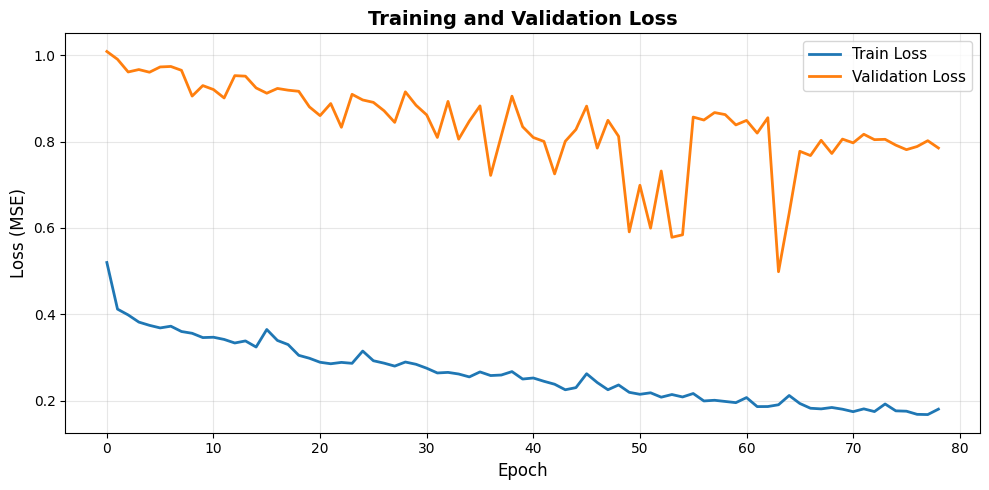

In [5]:
import os
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

print("Loading preprocessed data...")

# -----------------------------
# Load Data
# -----------------------------
DATA_DIR = '/kaggle/working/preprocessed_qm9_data'
X = np.load(os.path.join(DATA_DIR, 'X_fingerprints.npy'))
y = np.load(os.path.join(DATA_DIR, 'y_labels.npy'))

with open(os.path.join(DATA_DIR, 'config.pkl'), 'rb') as f:
    config = pickle.load(f)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Target properties: {config['target_properties']}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTrain: {X_train.shape[0]} samples")
print(f"Val: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

# -----------------------------
# Dataset
# -----------------------------
class MoleculeDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MoleculeDataset(X_train, y_train)
val_dataset = MoleculeDataset(X_val, y_val)
test_dataset = MoleculeDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# -----------------------------
# Transformer Model
# -----------------------------
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=256, nhead=8, num_layers=4, dim_feedforward=1024, dropout=0.1, output_dim=3):
        super(TransformerRegressor, self).__init__()
        
        self.input_projection = nn.Linear(input_dim, d_model)
        self.pos_embedding = nn.Parameter(torch.randn(1, 1, d_model))
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        self.output_head = nn.Sequential(
            nn.Linear(d_model, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, output_dim)
        )
        
    def forward(self, x):
        x = self.input_projection(x)
        x = x.unsqueeze(1)
        x = x + self.pos_embedding
        x = self.transformer_encoder(x)
        x = x.squeeze(1)
        output = self.output_head(x)
        return output

# -----------------------------
# Training Setup
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

model = TransformerRegressor(
    input_dim=X_train.shape[1],
    d_model=256,
    nhead=8,
    num_layers=4,
    dim_feedforward=1024,
    dropout=0.1,
    output_dim=y_train.shape[1]
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
    return total_loss / len(loader)

# -----------------------------
# Training Loop
# -----------------------------
print("\nStarting training...")

num_epochs = 100
best_val_loss = float('inf')
train_losses = []
val_losses = []
patience = 15
patience_counter = 0

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model, val_loader, criterion, device)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    scheduler.step(val_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_transformer_model.pth')
        patience_counter = 0
    else:
        patience_counter += 1
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.6f} Val Loss: {val_loss:.6f}")
    
    if patience_counter >= patience:
        print(f"\nEarly stopping at epoch {epoch+1}")
        break

# -----------------------------
# Save Scalers for FastAPI
# -----------------------------
print("\n" + "="*60)
print("Saving scalers and configuration for FastAPI deployment...")
print("="*60)

# Save the scalers
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
print("✓ Saved scaler_X.pkl")

with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)
print("✓ Saved scaler_y.pkl")

# Copy config to current directory for easier access
with open('config.pkl', 'wb') as f:
    pickle.dump(config, f)
print("✓ Saved config.pkl (copy)")

print("\n" + "="*60)
print("Training Complete - All files saved!")
print("="*60)

# Print summary



print("\nGenerating training curves...")

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_curves.png', dpi=150, bbox_inches='tight')
print(" Saved training_curves.png")




Loading best model...

Test Loss (MSE): 1.871473

Per-property metrics:

A:
  MAE: 61.851730
  RMSE: 4805.589844
  R2: 0.022236

B:
  MAE: 0.204451
  RMSE: 0.292257
  R2: 0.719877

C:
  MAE: 0.128119
  RMSE: 0.202328
  R2: 0.775801

mu:
  MAE: 0.676342
  RMSE: 0.934151
  R2: 0.605809

alpha:
  MAE: 2.747851
  RMSE: 4.108532
  R2: 0.753456

homo:
  MAE: 0.007935
  RMSE: 0.010607
  R2: 0.774504

lumo:
  MAE: 0.010690
  RMSE: 0.014511
  R2: 0.904417

gap:
  MAE: 0.012563
  RMSE: 0.017108
  R2: 0.870302

r2:
  MAE: 93.155121
  RMSE: 129.513168
  R2: 0.788122

zpve:
  MAE: 0.008236
  RMSE: 0.011120
  R2: 0.890005

u0:
  MAE: 12.005958
  RMSE: 18.928764
  R2: 0.780520

u298:
  MAE: 12.005894
  RMSE: 18.928028
  R2: 0.780534

h298:
  MAE: 12.005852
  RMSE: 18.927834
  R2: 0.780539

g298:
  MAE: 12.006413
  RMSE: 18.928513
  R2: 0.780531

cv:
  MAE: 1.445790
  RMSE: 2.004112
  R2: 0.757140

u0_atom:
  MAE: 65.062752
  RMSE: 95.667099
  R2: 0.843076

u298_atom:
  MAE: 65.561150
  RMSE: 96.3438

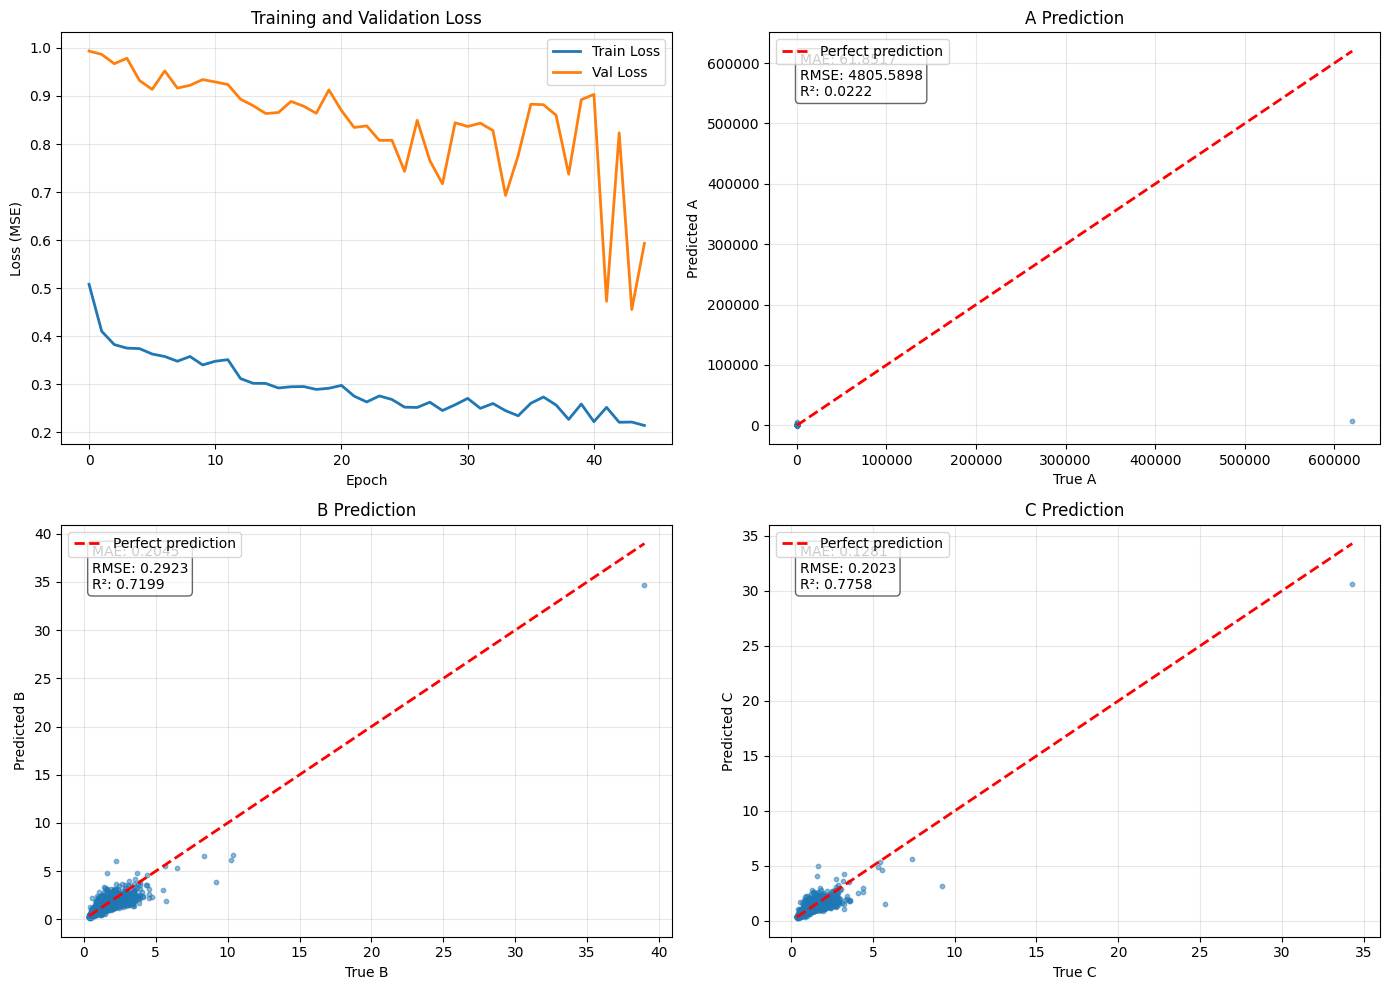


Training complete


In [5]:
print("\nLoading best model...")
model.load_state_dict(torch.load('/kaggle/working/best_transformer_model.pth'))

# -----------------------------
# Evaluation
# -----------------------------
test_loss = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss (MSE): {test_loss:.6f}")

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        all_preds.append(outputs.cpu().numpy())
        all_targets.append(y_batch.numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

# Inverse transform
all_preds = scaler_y.inverse_transform(all_preds)
all_targets = scaler_y.inverse_transform(all_targets)

# -----------------------------
# Metrics
# -----------------------------
from sklearn.metrics import mean_absolute_error, r2_score

metrics = []
print("\nPer-property metrics:")
for i, prop in enumerate(config['target_properties']):
    mae = mean_absolute_error(all_targets[:, i], all_preds[:, i])
    r2 = r2_score(all_targets[:, i], all_preds[:, i])
    rmse = np.sqrt(np.mean((all_targets[:, i] - all_preds[:, i])**2))
    metrics.append([prop, mae, rmse, r2])
    print(f"\n{prop}:")
    print(f"  MAE: {mae:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  R2: {r2:.6f}")

metrics_df = pd.DataFrame(metrics, columns=["Property", "MAE", "RMSE", "R2"])
print("\n==== Summary Metrics Table ====")
print(metrics_df)

# -----------------------------
# Plots
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training Loss
axes[0, 0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0, 0].plot(val_losses, label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Scatter Plots with metrics
for i, prop in enumerate(config['target_properties']):
    if i < 3:  # plot first 3 props
        row = (i + 1) // 2
        col = (i + 1) % 2
        axes[row, col].scatter(all_targets[:, i], all_preds[:, i], alpha=0.5, s=10)
        axes[row, col].plot([all_targets[:, i].min(), all_targets[:, i].max()],
                           [all_targets[:, i].min(), all_targets[:, i].max()],
                           'r--', linewidth=2, label='Perfect prediction')
        axes[row, col].set_xlabel(f'True {prop}')
        axes[row, col].set_ylabel(f'Predicted {prop}')
        axes[row, col].set_title(f'{prop} Prediction')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

        # Annotate metrics
        prop_metrics = metrics_df.loc[metrics_df['Property'] == prop].iloc[0]
        textstr = f"MAE: {prop_metrics['MAE']:.4f}\nRMSE: {prop_metrics['RMSE']:.4f}\nR²: {prop_metrics['R2']:.4f}"
        axes[row, col].text(0.05, 0.95, textstr, transform=axes[row, col].transAxes,
                            fontsize=10, verticalalignment='top',
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6))

plt.tight_layout()
plt.savefig('transformer_training_results_with_metrics.png', dpi=300, bbox_inches='tight')
print("\nSaved: transformer_training_results_with_metrics.png")
plt.show()

print("\nTraining complete")

In [1]:
pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, easyocr, fastai, kornia, peft, pytorch-ignite, pytorch-lightning, sentence-transformers, stable-baselines3, timm, torchaudio, torchdata, torchmetrics, torchvision
Note: you may need to restart the kernel to use updated packages.


In [6]:
!zip -r molformer.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/best_transformer_model.pth (deflated 7%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/preprocessed_qm9_data/ (stored 0%)
  adding: kaggle/working/preprocessed_qm9_data/X_fingerprints.npy (deflated 99%)
  adding: kaggle/working/preprocessed_qm9_data/preprocessed_qm9.csv (deflated 98%)
  adding: kaggle/working/preprocessed_qm9_data/config.pkl (deflated 24%)
  adding: kaggle/working/preprocessed_qm9_data/y_labels.npy (deflated 25%)
  adding: kaggle/working/scaler_y.pkl (deflated 12%)
  adding: kaggle/working/training_curves.png (deflated 7%)
  adding: kaggle/working/scaler_X.pkl (deflated 41%)
  adding: kaggle/working/config.pkl (deflated 24%)


In [9]:
from IPython.display import FileLink
FileLink(r'molformer.zip')

/kaggle/working/molformer.zip